# 9 Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
138102,9.607302,57.262082,22.751080
135727,10.216236,57.244547,93.607665
134471,10.261445,57.282209,21.386515
324707,9.695129,57.282519,27.403798
180115,10.375374,57.290043,28.047520


In [3]:
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()

In [4]:
epsilon = [x/100 for x in range(5, 51)]
minimum = [x for x in range(1, 11)]
master_list = []

In [5]:
for e in epsilon:
    inner_list = []
    for m in minimum:
        dbscan = DBSCAN(eps=e, min_samples=m)
        XX.cluster = dbscan.fit_predict(XX[['lat','lon', 'alt']])
        inner_list.append(metrics.silhouette_score(XX[['lon', 'lat', 'alt']], XX.cluster))
    master_list.append(inner_list)
            

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [6]:
master_list

[[0.14832712487755523,
  -0.06342779725271151,
  -0.2467039377289826,
  -0.3517191928465609,
  -0.40578888673835006,
  -0.4400884973236909,
  -0.4589460877539919,
  -0.47626830142885074,
  -0.46027189850509287,
  -0.46477383833071834],
 [0.09222229914629333,
  -0.028108744990540988,
  -0.1612377938013053,
  -0.28452101731656043,
  -0.3236519060801598,
  -0.3879740215195288,
  -0.40824764377147094,
  -0.4164488772017945,
  -0.4336475705567804,
  -0.43496897147763613],
 [0.04272554102326286,
  -0.017200358319033583,
  -0.12942926914616668,
  -0.23526883956489442,
  -0.2889141390623572,
  -0.3311909359804578,
  -0.3538182102358708,
  -0.3865564741430718,
  -0.4012653206508457,
  -0.4038411924183647],
 [-0.03212024006958516,
  -0.046860707142449345,
  -0.12111740541115376,
  -0.18217779060653305,
  -0.25010334902911746,
  -0.32172619927580426,
  -0.3565897324211809,
  -0.36648548023936456,
  -0.3696077709568634,
  -0.3847131203017423],
 [-0.12279459591689725,
  -0.11067243705822843,
  -0.1

In [7]:
pd.value_counts(XX.cluster)

 0    9736
 1     254
-1      10
dtype: int64

In [235]:
XX['cluster'] = XX.cluster
XX.head()

,lat,lon,alt,cluster
138102,-0.205768,0.617436,0.031645,0
135727,0.761804,0.556681,3.810342,0
134471,0.833640,0.687168,-0.041125,0
324707,-0.066214,0.688242,0.279769,0
180115,1.014669,0.714310,0.314098,0


In [26]:
SilCoeff = np.array(master_list)
SilCoeff

array([[ 0.14832712, -0.0634278 , -0.24670394, -0.35171919, -0.40578889,
        -0.4400885 , -0.45894609, -0.4762683 , -0.4602719 , -0.46477384],
       [ 0.0922223 , -0.02810874, -0.16123779, -0.28452102, -0.32365191,
        -0.38797402, -0.40824764, -0.41644888, -0.43364757, -0.43496897],
       [ 0.04272554, -0.01720036, -0.12942927, -0.23526884, -0.28891414,
        -0.33119094, -0.35381821, -0.38655647, -0.40126532, -0.40384119],
       [-0.03212024, -0.04686071, -0.12111741, -0.18217779, -0.25010335,
        -0.3217262 , -0.35658973, -0.36648548, -0.36960777, -0.38471312],
       [-0.1227946 , -0.11067244, -0.14701341, -0.17654939, -0.21540602,
        -0.27174321, -0.32193378, -0.34593677, -0.37924647, -0.36303621],
       [-0.25996207, -0.22019773, -0.22322451, -0.18755898, -0.1979708 ,
        -0.20487474, -0.2270752 , -0.30019858, -0.3220298 , -0.3636246 ],
       [-0.36326958, -0.31806223, -0.31313863, -0.31091903, -0.23829491,
        -0.21464815, -0.20659207, -0.23080714

In [8]:
scores = pd.DataFrame(master_list, columns = minimum)
scores

,1,2,3,4,5,6,7,8,9,10
0,0.148327,-0.063428,-0.246704,-0.351719,-0.405789,-0.440088,-0.458946,-0.476268,-0.460272,-0.464774
1,0.092222,-0.028109,-0.161238,-0.284521,-0.323652,-0.387974,-0.408248,-0.416449,-0.433648,-0.434969
2,0.042726,-0.017200,-0.129429,-0.235269,-0.288914,-0.331191,-0.353818,-0.386556,-0.401265,-0.403841
3,-0.032120,-0.046861,-0.121117,-0.182178,-0.250103,-0.321726,-0.356590,-0.366485,-0.369608,-0.384713
4,-0.122795,-0.110672,-0.147013,-0.176549,-0.215406,-0.271743,-0.321934,-0.345937,-0.379246,-0.363036
5,-0.259962,-0.220198,-0.223225,-0.187559,-0.197971,-0.204875,-0.227075,-0.300199,-0.322030,-0.363625
6,-0.363270,-0.318062,-0.313139,-0.310919,-0.238295,-0.214648,-0.206592,-0.230807,-0.274747,-0.296029
7,-0.463955,-0.408538,-0.381375,-0.309293,-0.299270,-0.304567,-0.311276,-0.264616,-0.236600,-0.231190
8,-0.566330,-0.508564,-0.448526,-0.417922,-0.355864,-0.356217,-0.354408,-0.330053,-0.358523,-0.363862
9,-0.629142,-0.579391,-0.521906,-0.495320,-0.404301,-0.396652,-0.342283,-0.339488,-0.307925,-0.352512


<IPython.core.display.Javascript object>


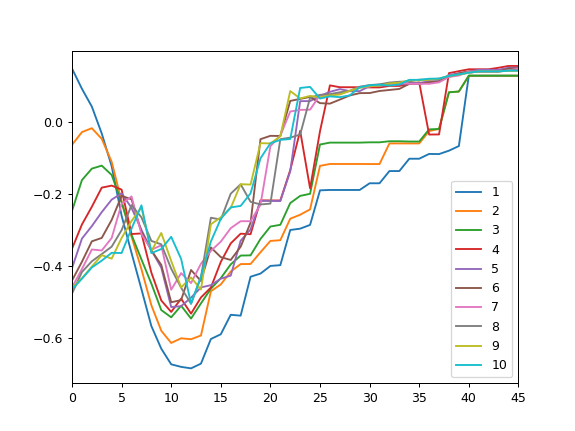

In [19]:
scores.plot.line()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data. If your data is labeled already, with a class that you are attempting to predict, be sure to not use it in fitting/training/predicting. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D and 3D plots. 

For bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot
- Plots of the clustered data

In [174]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [258]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [259]:
attributes = data.drop(['Channel', 'Milk', 'Region', 'Detergents_Paper', 'Delicassen'], axis = 1)
attributes.head()

,Fresh,Grocery,Frozen
0,12669,7561,214
1,7057,9568,1762
2,6353,7684,2405
3,13265,4221,6404
4,22615,7198,3915


In [260]:
target = data.Channel
target.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

In [261]:
target_names = ('Horeca', 'Retail')

<IPython.core.display.Javascript object>


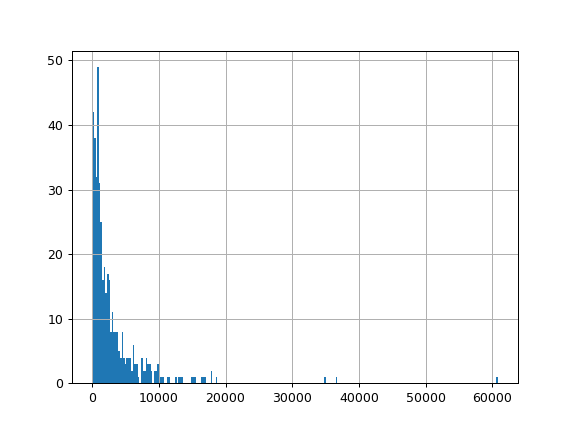

In [267]:
fig = plt.figure()
attributes.Frozen.hist(bins=250)

<IPython.core.display.Javascript object>


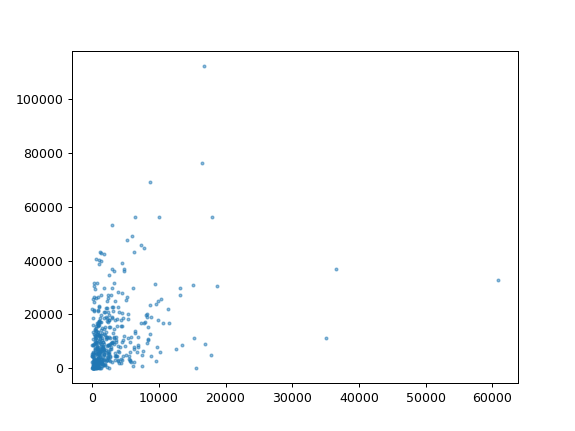

In [268]:
fig = plt.figure()
plt.scatter(attributes.Frozen, attributes.Fresh, alpha=.5, s = 5 )

In [270]:
atts = attributes.copy()
atts['grocery'] = (attributes.Grocery - attributes.Grocery.mean())/attributes.Grocery.std()
atts['fresh'] = (attributes.Fresh - attributes.Fresh.mean())/attributes.Fresh.std()
atts['frozen'] = (attributes.Frozen - attributes.Frozen.mean())/attributes.Frozen.std()

In [271]:
epsilon = [x/100 for x in range(5, 51, 5)]
minimum = [x for x in range(1, 6)]
master_list = []

In [272]:
for e in epsilon:
    inner_list = []
    for m in minimum:
        dbscan = DBSCAN(eps=e, min_samples=m)
        atts.cluster = dbscan.fit_predict(atts[['grocery','fresh','frozen']])
        inner_list.append(metrics.adjusted_rand_score(target, atts.cluster))
    master_list.append(inner_list)
            

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [273]:
master_list

[[0.0005445384099220739,
  -0.041482474387226694,
  -0.030517196076247505,
  -0.018024710704587558,
  0.0],
 [0.010492998073340427,
  -0.015311843014870038,
  -0.042868251547172026,
  -0.07830147056968152,
  -0.07025711009089504],
 [0.03294938081126544,
  0.020372667892030454,
  0.008605050582670434,
  0.007648059944703792,
  -0.00872893310285045],
 [0.06982408405630063,
  0.05751423053926699,
  0.05309117057683179,
  0.02431833977824274,
  0.023843977153794528],
 [0.028392751598458027,
  0.02200624671924274,
  0.0173285274643999,
  0.007173271421621915,
  0.052979489954878944],
 [0.02280132848995344,
  0.020523156617814804,
  0.019033520738675286,
  0.03500110949088024,
  0.0878198836240267],
 [0.0004931573966795862,
  0.0018194398971199013,
  -0.0006366182650705913,
  0.002867015426113492,
  0.006811272844026275],
 [0.019723549680698525,
  0.019398697373050076,
  0.01752503454527213,
  0.01985167560488118,
  0.021495913923192826],
 [0.0012015202304798617,
  0.000785430374547884,
  0.

In [274]:
pd.value_counts(atts.cluster)

 0    386
-1     47
 1      7
dtype: int64

In [275]:
channel = pd.DataFrame(master_list, columns = minimum)
channel

,1,2,3,4,5
0,0.000545,-0.041482,-0.030517,-0.018025,0.000000
1,0.010493,-0.015312,-0.042868,-0.078301,-0.070257
2,0.032949,0.020373,0.008605,0.007648,-0.008729
3,0.069824,0.057514,0.053091,0.024318,0.023844
4,0.028393,0.022006,0.017329,0.007173,0.052979
5,0.022801,0.020523,0.019034,0.035001,0.087820
6,0.000493,0.001819,-0.000637,0.002867,0.006811
7,0.019724,0.019399,0.017525,0.019852,0.021496
8,0.001202,0.000785,0.001143,0.000313,0.009233
9,0.009301,0.008771,0.008383,0.005707,0.002010


<IPython.core.display.Javascript object>


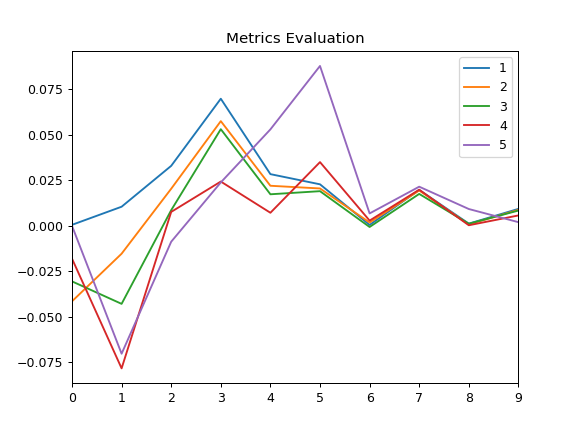

In [276]:
channel.plot.line(title = "Metrics Evaluation")

In [300]:
dbscan = DBSCAN(eps=.3, min_samples=5)
atts.cluster = dbscan.fit_predict(atts[['grocery','fresh','frozen']])
metrics.adjusted_rand_score(target, atts.cluster)
pd.value_counts(atts.cluster)

 0    296
-1    111
 1     20
 2      8
 3      5
dtype: int64

<IPython.core.display.Javascript object>


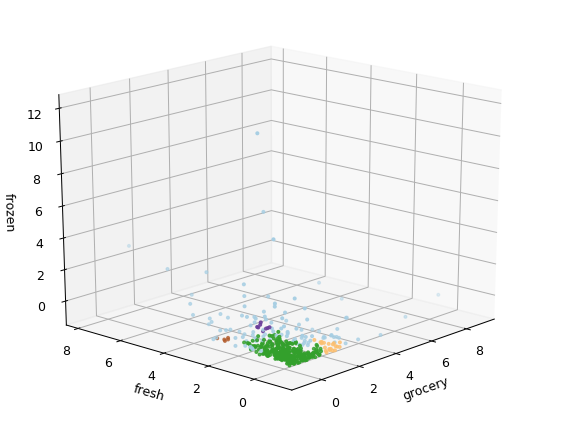

In [301]:
fig = plt.figure(5)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=140)

plt.cla()

ax.scatter(atts['grocery'], atts['fresh'], atts['frozen'], c=atts.cluster, s=5, cmap='Paired')

ax.set_xlabel('grocery')
ax.set_ylabel('fresh')
ax.set_zlabel('frozen')
plt.show()

<IPython.core.display.Javascript object>


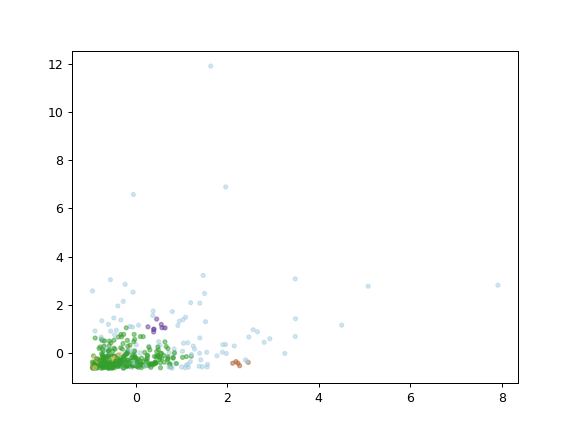

In [302]:
fig = plt.figure()
plt.scatter(atts.fresh, atts.frozen, alpha=.5, s=10, c=atts.cluster, cmap='Paired')


This isn't a very good example of clustering - very low accuracy compared to Channel in data

In [343]:
## PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA


In [322]:
all_atts = data.drop(['Channel'], axis = 1)

In [328]:
pca = decomposition.PCA(n_components=3)
pca.fit_transform
pca.fit(all_atts)
all_atts = pca.transform(all_atts)
all_atts = pd.DataFrame(all_atts)
all_atts.head()

,0,1,2
0,650.022124,1585.519090,-95.390645
1,-4426.804978,4042.451509,1534.804743
2,-4841.998705,2578.762176,3801.384789
3,990.346438,-6279.805996,1396.959814
4,10657.998733,-2159.725815,-20.042983


In [329]:
epsilon = [x/100 for x in range(5, 51, 5)]
minimum = [x for x in range(1, 6)]
master_list = []

In [340]:
for e in epsilon:
    inner_list = []
    for m in minimum:
        dbscan = DBSCAN(eps=e, min_samples=m)
        all_atts.cluster = dbscan.fit_predict(all_atts[[0,1,2]])
        inner_list.append(metrics.adjusted_rand_score(target, all_atts.cluster))
    master_list.append(inner_list)
            

In [341]:
pd.value_counts(all_atts.cluster)

-1    440
dtype: int64

In [342]:
dbscan.fit_predict(all_atts[[0,1,2]])

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

Unsure why DBSCAN doesn't like PCA values

## Note
You may use any for both parts 1 and 2, I only recommend using the data I used in the Lesson for part 1. I've included several new datasets in the `data/` folder, such as `beers.csv`, `snow_tweets.csv`, `data/USCensus1990.data.txt.gz`. You do not need to unzip or ungzip any data files. Pandas can open these files on its own.